# Decision tree
Decision tree(s) is, net zoals de andere uitgewerkte algoritmes voor dit project, een machine learning algoritme dat gebruikt kan worden voor classificatie en regressie problemen. In deze instantie wordt geprobeerd om middels S.M.A.R.T waardes `failures` te voorspellen. Om dit werkelijkheid te maken zal een `classificatie decision tree` opgebouwd worden.

De betreffende decision tree zal opgebouwd worden door middel van de ingebouwde methode van `Scikit-learn` genaamd `DecisionTreeClassifier`.

## Libraries

In [1]:
import pandas as pd
import numpy as np
import pickle

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score, ConfusionMatrixDisplay, confusion_matrix

import matplotlib.pyplot as plt

## Data importeren
Voorhand is van de gekozen dataset een sampleset gegenereerd, in het notebook `2 - sample analysing` (de dataset zonder 100% NaN waardes). 

In [2]:
df = pd.read_csv("../data/sample_without_100nan.csv")
df.head(20)

,date,serial_number,model,failure,smart_5_raw,smart_9_raw,smart_187_raw,smart_188_raw,smart_194_raw,smart_197_raw,smart_198_raw
0,2020-01-01,Z305B2QN,ST4000DM000,0,0.0,35462.0,0.0,0.000000e+00,22.0,0.0,0.0
1,2020-01-01,ZJV0XJQ4,ST12000NM0007,0,0.0,12494.0,0.0,0.000000e+00,28.0,0.0,0.0
2,2020-01-01,ZJV0XJQ3,ST12000NM0007,0,0.0,9544.0,0.0,0.000000e+00,29.0,0.0,0.0
3,2020-01-01,ZJV0XJQ0,ST12000NM0007,0,0.0,13098.0,0.0,0.000000e+00,25.0,0.0,0.0
4,2020-01-01,ZA16NQJR,ST8000NM0055,0,0.0,23427.0,0.0,0.000000e+00,32.0,0.0,0.0
5,2020-01-01,ZJV02XWG,ST12000NM0007,0,0.0,14439.0,0.0,0.000000e+00,20.0,0.0,0.0
6,2020-01-01,ZJV1CSVX,ST12000NM0007,0,0.0,12764.0,0.0,0.000000e+00,31.0,0.0,0.0
7,2020-01-01,ZJV02XWA,ST12000NM0007,0,0.0,14440.0,0.0,8.160562e+10,22.0,0.0,0.0
8,2020-01-01,ZA18CEBS,ST8000NM0055,0,0.0,20399.0,0.0,0.000000e+00,33.0,0.0,0.0
9,2020-01-01,Z305DEMG,ST4000DM000,0,0.0,33765.0,0.0,0.000000e+00,25.0,0.0,0.0


## Data analyze
Bij het opbouwen van een decision tree dient gekeken te worden of de gebruikte dataset NaN waardes bevat. Decision trees kunnen niet of amper opgebouwd worden op het moment dat NaN waardes aanwezig zijn.

In [3]:
# Vaststellen som NaN waardes van elke feature
df.isna().sum()

date                0
serial_number       0
model               0
failure             0
smart_5_raw      6147
smart_9_raw      6147
smart_187_raw    6147
smart_188_raw    6147
smart_194_raw    6147
smart_197_raw    6147
smart_198_raw    6147
dtype: int64

In [4]:
# Som missende waardes gehele dataframe
print(f"Som NaN dataframe: {df.isna().sum().sum()}")

# Aantal rows, toepasbaar voor alle features
print(f"Aantal rows dataframe: {len(df.index)}")

Som NaN dataframe: 43029
Aantal rows dataframe: 22008389


Zoals te zien is bevat de gebruikte dataset NaN waardes. Decision trees kunnen niet of amper opgebouwd worden op het moment NaN waardes aanwezig zijn. Om dit aan te pakken zijn een aantal mogelijkheden, namelijk:
- Het aanvullen van de NaN waardes middels een vorm van `imputation`
- Het verwijderen (`pandas.DataFrame.drop()`) van de rijen met missende waardes

## Data cleaning
In deze instantie is de keuze gemaakt om de NaN waardes aan te vullen, hiervoor wordt gebruik gemaakt van de ingebouwde methode van de library `pandas` namelijk: [`pandas.fillna()`](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.fillna.html). Voor het daadwerkelijk imputen van de data wordt gebruik gemaakt van de methode `ffill`.

In [5]:
df.fillna(method='ffill', inplace=True)

# Vaststellen som NaN waardes van elke feature
df.isna().sum()

date             0
serial_number    0
model            0
failure          0
smart_5_raw      0
smart_9_raw      0
smart_187_raw    0
smart_188_raw    0
smart_194_raw    0
smart_197_raw    0
smart_198_raw    0
dtype: int64

## Data preparation
Het doel is het kunnen voorspellen van `failure` op basis van S.M.A.R.T waardes die de grootste impact hierop uitoefenen.

De data wordt opgedeeld in een tweetal matrices, waaronder `X` voor de S.M.A.R.T waardes en `y` voor `failure`.

In [6]:
df_features = ['smart_5_raw', 'smart_9_raw', 'smart_187_raw', 'smart_188_raw', 'smart_194_raw', 'smart_197_raw', 'smart_198_raw']

X = df[df_features]
y = df['failure']

X.shape, y.shape

((22008389, 7), (22008389,))

Voor het opsplitsen van de dataset in trainingsset en een validatieset wordt gebruik gemaakt van de ingebouwde methode van `Scikit-learn` genaamd `train_test_split`. De betreffende "sets" worden opgesplits in een 80/20 split en in een later stadia gebruikt om het model te trainen.

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Initiëel weergave model
Om een beeld te geven hoe de decision tree opgebouwd zal worden zonder enige vorm van pruning wordt onderstaand een decision tree weergegeven. Aanvullend worden de volgende metrics weergegeven: `accuracy score`, `precision score`, `recal score` en de `F1 score`.

In [8]:
clf = DecisionTreeClassifier(random_state=42)
clf.fit(X_train, y_train)
y_train_pred = clf.predict(X_train)
y_test_pred = clf.predict(X_test)

In [9]:
print(f"Accuracy train: {accuracy_score(y_train, y_train_pred)} | Accuracy test: {accuracy_score(y_test, y_test_pred)}")
print(f"Precision train: {precision_score(y_train, y_train_pred)} | Precision test: {precision_score(y_test, y_test_pred)}")
print(f"Recall train: {recall_score(y_train, y_train_pred)} | Recall train: {recall_score(y_test, y_test_pred)}")
print(f"F1 train: {f1_score(y_train, y_train_pred)} | F1 test: {f1_score(y_test, y_test_pred)}")

Accuracy train: 0.9999902877942394 | Accuracy test: 0.9999493375026524
Precision train: 1.0 | Precision test: 0.039473684210526314
Recall train: 0.6946428571428571 | Recall train: 0.0196078431372549
F1 train: 0.8198103266596417 | F1 test: 0.026200873362445413


De parameter `class_names` krijgt de volgende meetwaardes: `0` geen failure, `1` failure

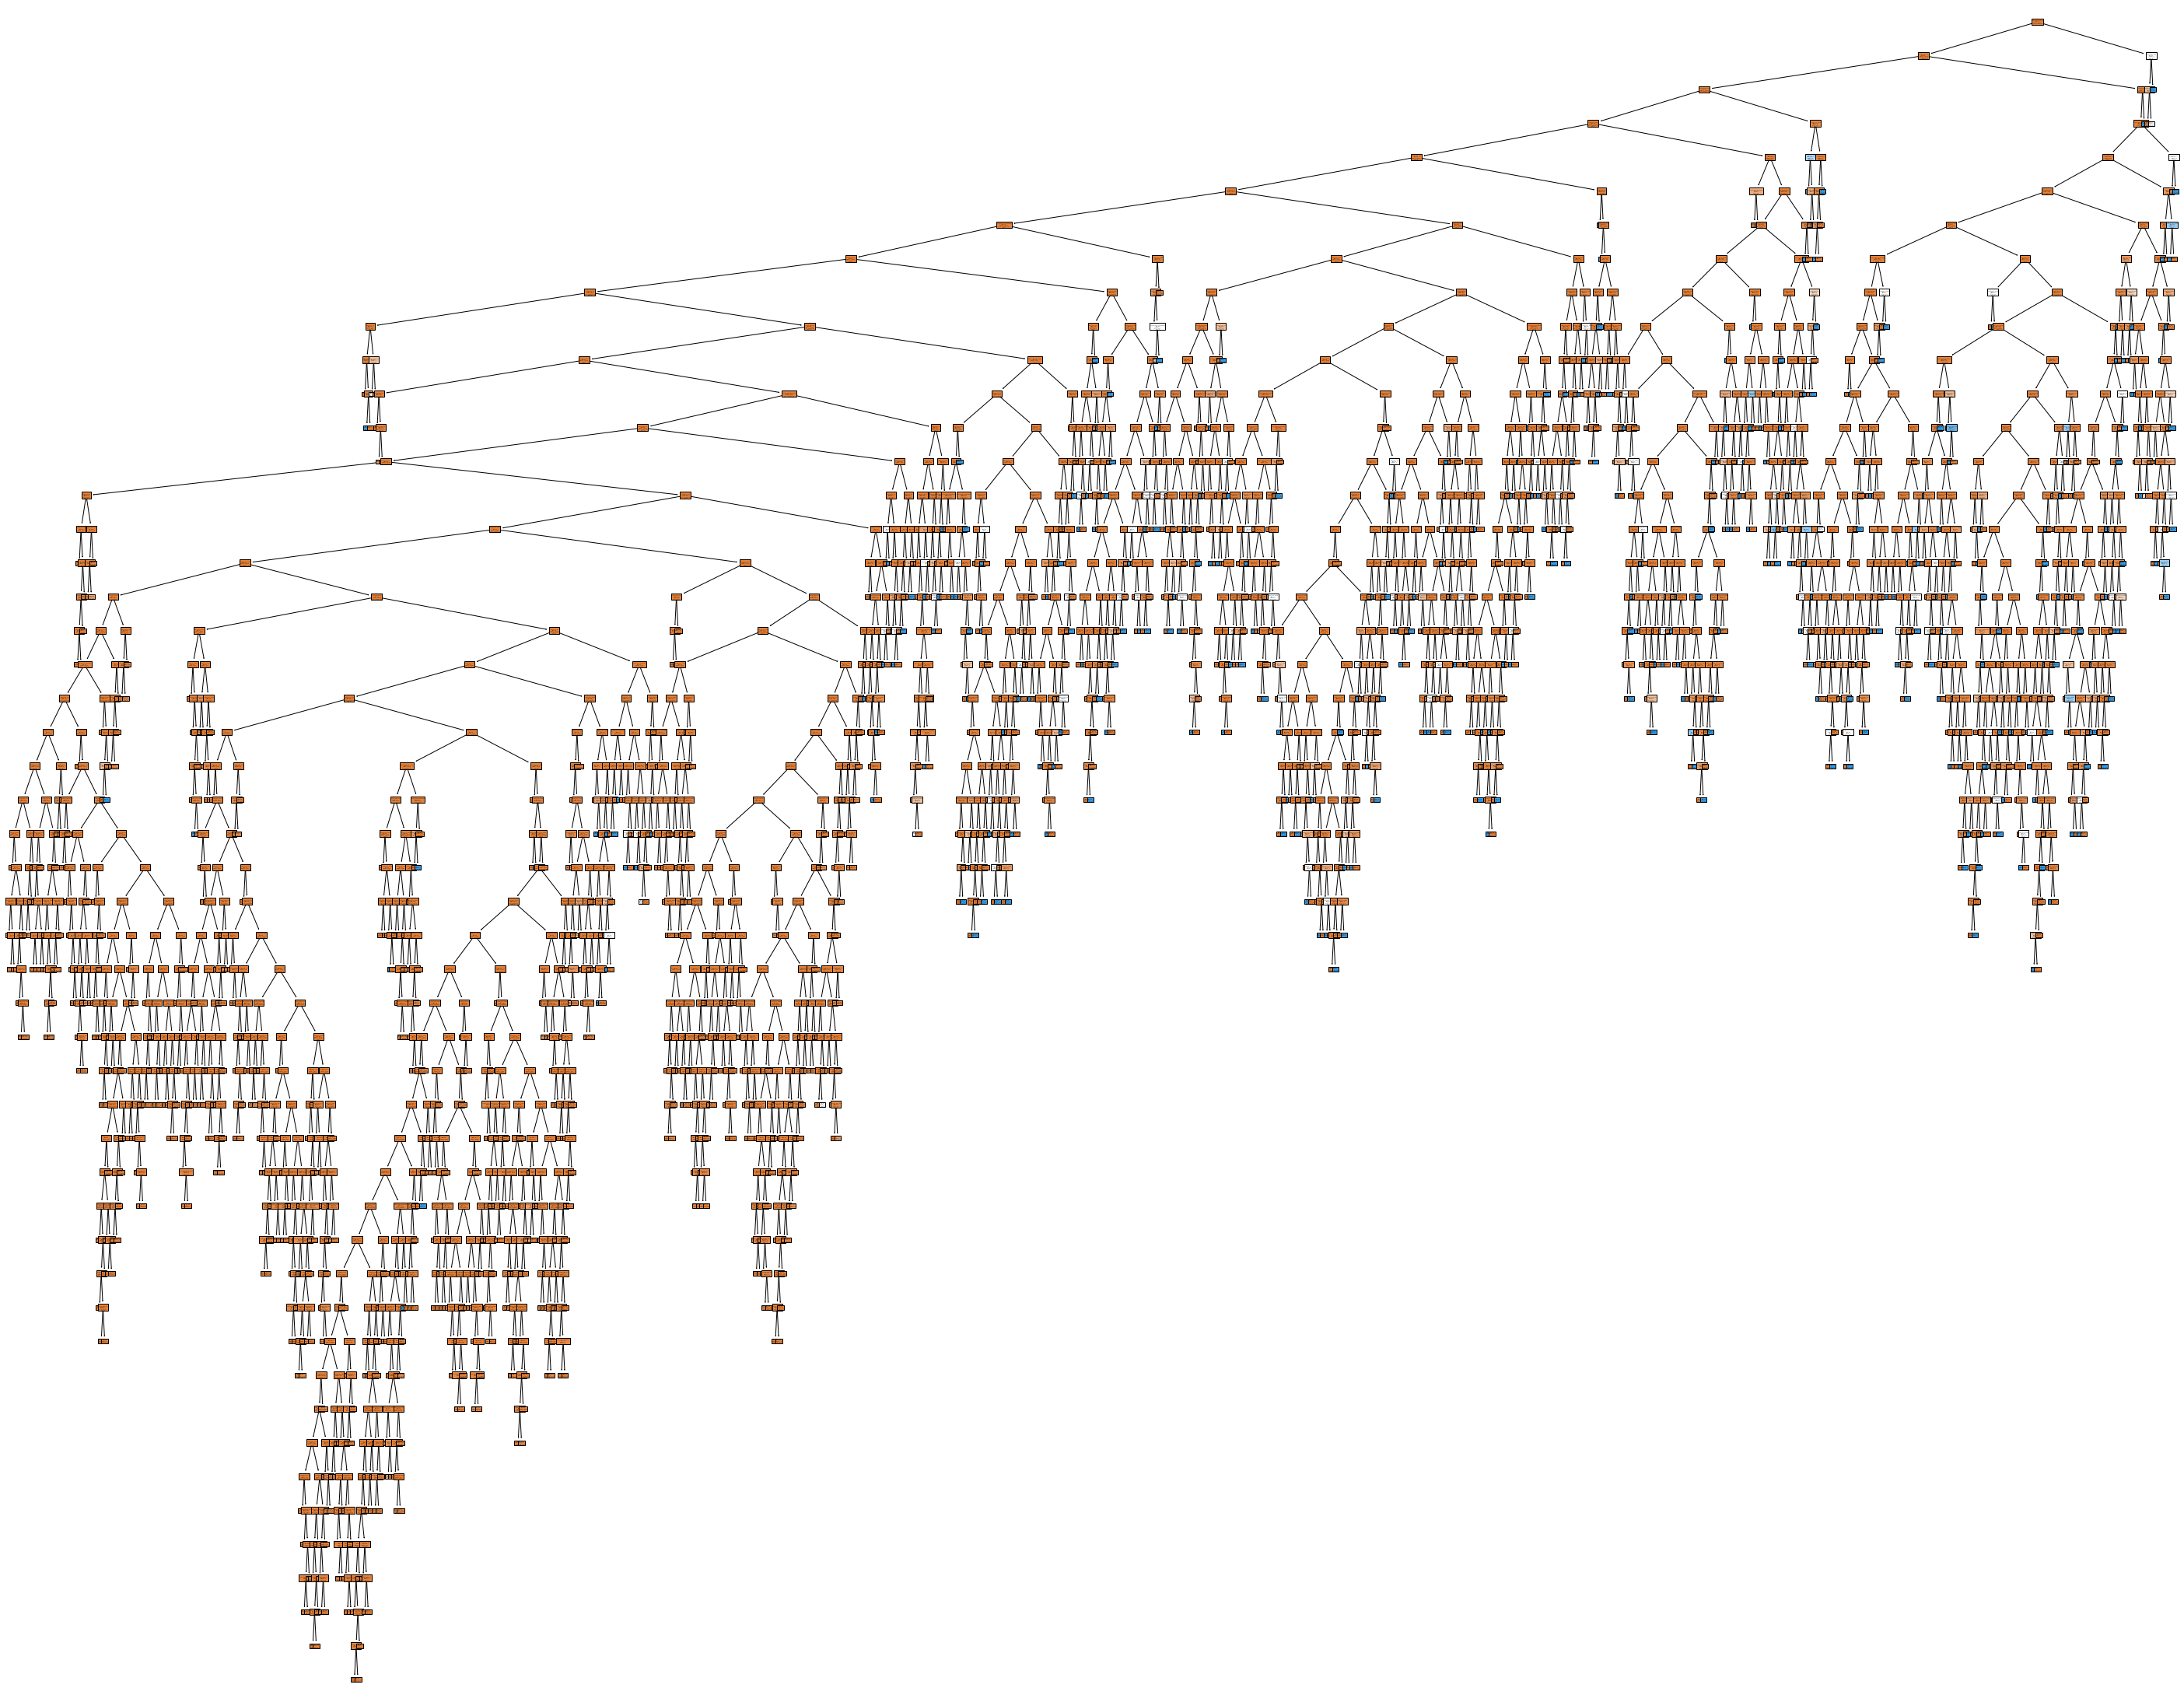

In [10]:
fig = plt.figure(figsize=(50, 40))
_ = plot_tree(clf, feature_names=df_features, class_names=['0', '1'], filled=True)

Als gekeken wordt naar de accuracy waarde dan blijkt er een goede accuracy te zijn dat als indicatie kan geven dat het niet benodigd is om pruning toe te passen. Echter op het moment dat gekeken wordt naar de andere metrics en de visualisatie van de decision tree is te zien dat pruning potentiële meerwaarde kan leveren bij het wegwerken van impurities en overfitting. Om te bepalen of pruning daadwerkelijk geholpen heeft wordt naderhand dezelfde metrics bepaald en geconcludeerd of pruning geholpen heeft en of decision trees opzichzelf gebruikt kan worden voor het voorspellen van `failure`.

## Pruning
Zoals eerder aangekaart is het benodigd om een vorm van pruning toe te passen. Pruning is het vaststellen van het optimale aantal nodes (leaves) van een decision tree. Om pruning toe te passen kan een tweetal methoden gebruikt worden, namelijk:
- [`pre-tuning`](https://www.kaggle.com/arunmohan003/pruning-decision-trees-tutorial/notebook#1.-Pre-pruning-techniques): Op voorhand de groei van de decision tree limiteren. Een effectieve manier om dit toe te passen is middels de method `GridSearchCV`. Van te voren worden de volgende meetwaardes voor gedefiniëerd: `max_depth`, `min_sample_split`, `min_sample_leaf`.
- [`post-pruning`](https://scikit-learn.org/stable/auto_examples/tree/plot_cost_complexity_pruning.html): Om in beeld te brengen wat de optimale decision tree is worden een `x` aantal forests opgebouwd met differiënterende waardes op basis van de alpha waardes (`ccp_alpha`) berekend middels de ingebouwde `Sci-kit` decision tree functie genaamd `cost_complexity_pruning_path()`. 

Op basis van gevonden informatie en testresultaten blijkt dat  de beste resultaten levert op de gebruikte dataset. Hierdoor zal het daadwerkelijke model opgebouwd worden middels de eerder benoemde post-pruning technieken.

## Trainen model
Hier wordt het model getrained. Dit wordt gedaan door middel van het `DecisionTreeClassifier` algoritme. Middels de functie `cost_complexity_pruning_path()` worden de alpha waardes (`ccp_alphas`) berekend.

In [13]:
dt_path = DecisionTreeClassifier(random_state=42).cost_complexity_pruning_path(X_train, y_train)
ccp_alphas = dt_path.ccp_alphas

Middels de `ccp_alpha` waardes worden verschillende decision trees opgebouwd (forest). De resultaten van deze decision trees worden opgeslagen in een list opgeslagen in de variabele `clfs`. De waardes uit deze list worden naderhand gebruikt voor het bepalen van de optimale diepte van de decision tree model.

In [14]:
clfs = []

for ccp_alpha in ccp_alphas:
    clf = DecisionTreeClassifier(random_state=42, ccp_alpha=ccp_alpha)
    clf.fit(X_train, y_train)
    clfs.append(clf)

Onderstaand worden een viertal variabelen gedefiniëerd, namelijk:
- `clfs`: Dezelfde list als voorheen echter wordt de laatste waarde niet meegenomen, dit is namelijk de root node van de eerder gemaakte forest
- `ccp_alphas`: Dezelfde list aan alpha waardes als voorheen echter wordt de laatste waarde niet meegenomen, dit is namelijk de alpha waarde die gebruikt werdt voor de root node van de eerder gemaakte forest
- `node_counts`: Een lijst waarin het aantal leafs in opgeslagen wordt in relatie tot de decision trees uit het variabele `clfs`
- `depth`: Een lijst waarin de diepte in opgeslagen wordt in relatie tot de decision trees uit het variabele `clfs`

De depth en node_counts van elke decision tree uit de forest vergeleken in relatie tot de alpha waardes, dit wordt in grafiek vorm weergegeven. Uiteindelijk worden deze waardes gebruikt voor het bepalen van de optimale waardes om het decision tree model te trainen.

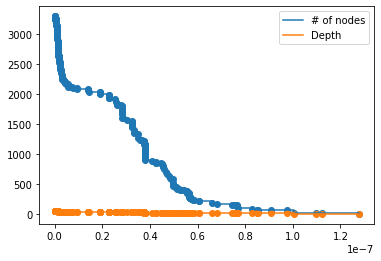

In [15]:
# Voorbereiden variables
clfs = clfs[:-1]
ccp_alphas = ccp_alphas[:-1]
node_counts = [clf.tree_.node_count for clf in clfs]
depth = [clf.tree_.max_depth for clf in clfs]

plt.scatter(ccp_alphas, node_counts)
plt.scatter(ccp_alphas, depth)
plt.plot(ccp_alphas, node_counts, label='# of nodes', drawstyle="steps-post")
plt.plot(ccp_alphas, depth, label='Depth', drawstyle="steps-post")
plt.legend()
plt.show()

Vervolgens worden wederom twee variabelen gedefiniëerd, namelijk: `train_scores` en `test_scores`. Beide variabelen krijgen de scores toegewezen van de decision trees uit het variabel `clfs`.

Deze waardes worden gebruikt, net zoals de `depth` en `node_counts` variabelen, voor het trainen van het decision tree model. Tevens worden deze waardes vergeleken met de alpha.

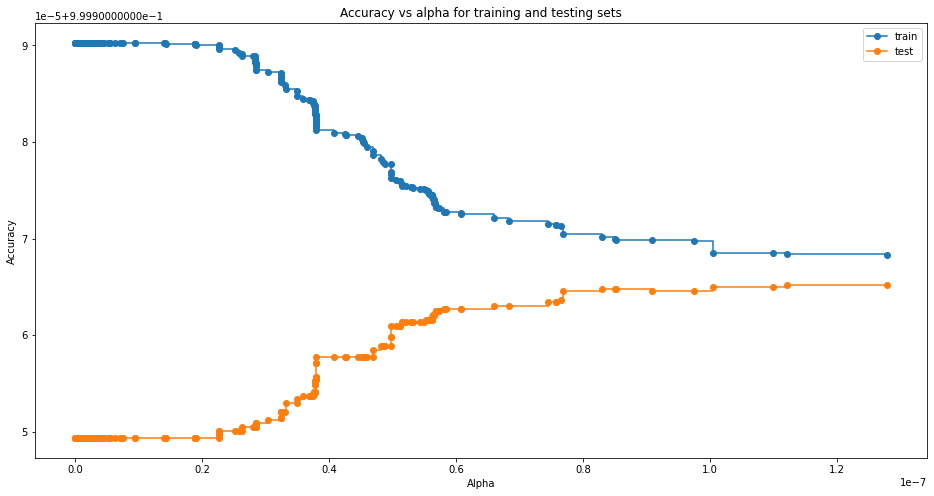

In [16]:
# Voorbereiden variables
train_scores = [clf.score(X_train, y_train) for clf in clfs]
test_scores = [clf.score(X_test, y_test) for clf in clfs]

fig, ax = plt.subplots(figsize=(16, 8))
ax.plot(ccp_alphas, train_scores, marker='o', label="train", drawstyle="steps-post")
ax.plot(ccp_alphas, test_scores, marker='o', label="test", drawstyle="steps-post")

ax.set_xlabel("Alpha")
ax.set_ylabel("Accuracy")
ax.set_title("Accuracy vs alpha for training and testing sets")
ax.legend()
plt.show()

Om daadwerkelijk de optimale waardes te bepalen wordt een nieuwe `DataFrame` gemaakt.

In [17]:
i = np.arange(len(ccp_alphas))
ccp = pd.DataFrame({
    'Depth': pd.Series(depth, index=i), 
    'Node': pd.Series(node_counts, index=i), 
    'ccp': pd.Series(ccp_alphas, index=i), 
    'train_scores': pd.Series(train_scores, index=i),
    'test_scores': pd.Series(test_scores, index=i)
})

ccp.tail()
best_scores = ccp[ccp['test_scores']==ccp['test_scores'].max()]
best_scores

,Depth,Node,ccp,train_scores,test_scores
310,5,11,1.121268e-07,0.999968,0.999965
311,4,9,1.277922e-07,0.999968,0.999965


In bovenstaande tabel wordt de meest optimale waardes aangegeven. De `Depth` en `Node` waardes worden gebruikt voor het trainen van het model.

In [32]:
dt_model = DecisionTreeClassifier(
    random_state=42, 
    max_depth=list(ccp.loc[best_scores.index, ['Depth']].max())[0],
    max_leaf_nodes=list(ccp.loc[best_scores.index, ['Node']].max())[0]
    )
dt_model.fit(X_train, y_train)

dt_y_train_predict = dt_model.predict(X_train)
dt_y_test_predict = dt_model.predict(X_test)

In [33]:
print(f"Accuracy train: {accuracy_score(y_train, dt_y_train_predict)} | Accuracy test: {accuracy_score(y_test, dt_y_test_predict)}")
print(f"Precision train: {precision_score(y_train, dt_y_train_predict)} | Precision test: {precision_score(y_test, dt_y_test_predict)}")
print(f"Recall train: {recall_score(y_train, dt_y_train_predict)} | Recall train: {recall_score(y_test, dt_y_test_predict)}")
print(f"F1 train: {f1_score(y_train, dt_y_train_predict)} | F1 test: {f1_score(y_test, dt_y_test_predict)}")

Accuracy train: 0.9999685915217215 | Accuracy test: 0.9999650133426389
Precision train: 1.0 | Precision test: 0.0
Recall train: 0.0125 | Recall train: 0.0
F1 train: 0.02469135802469136 | F1 test: 0.0


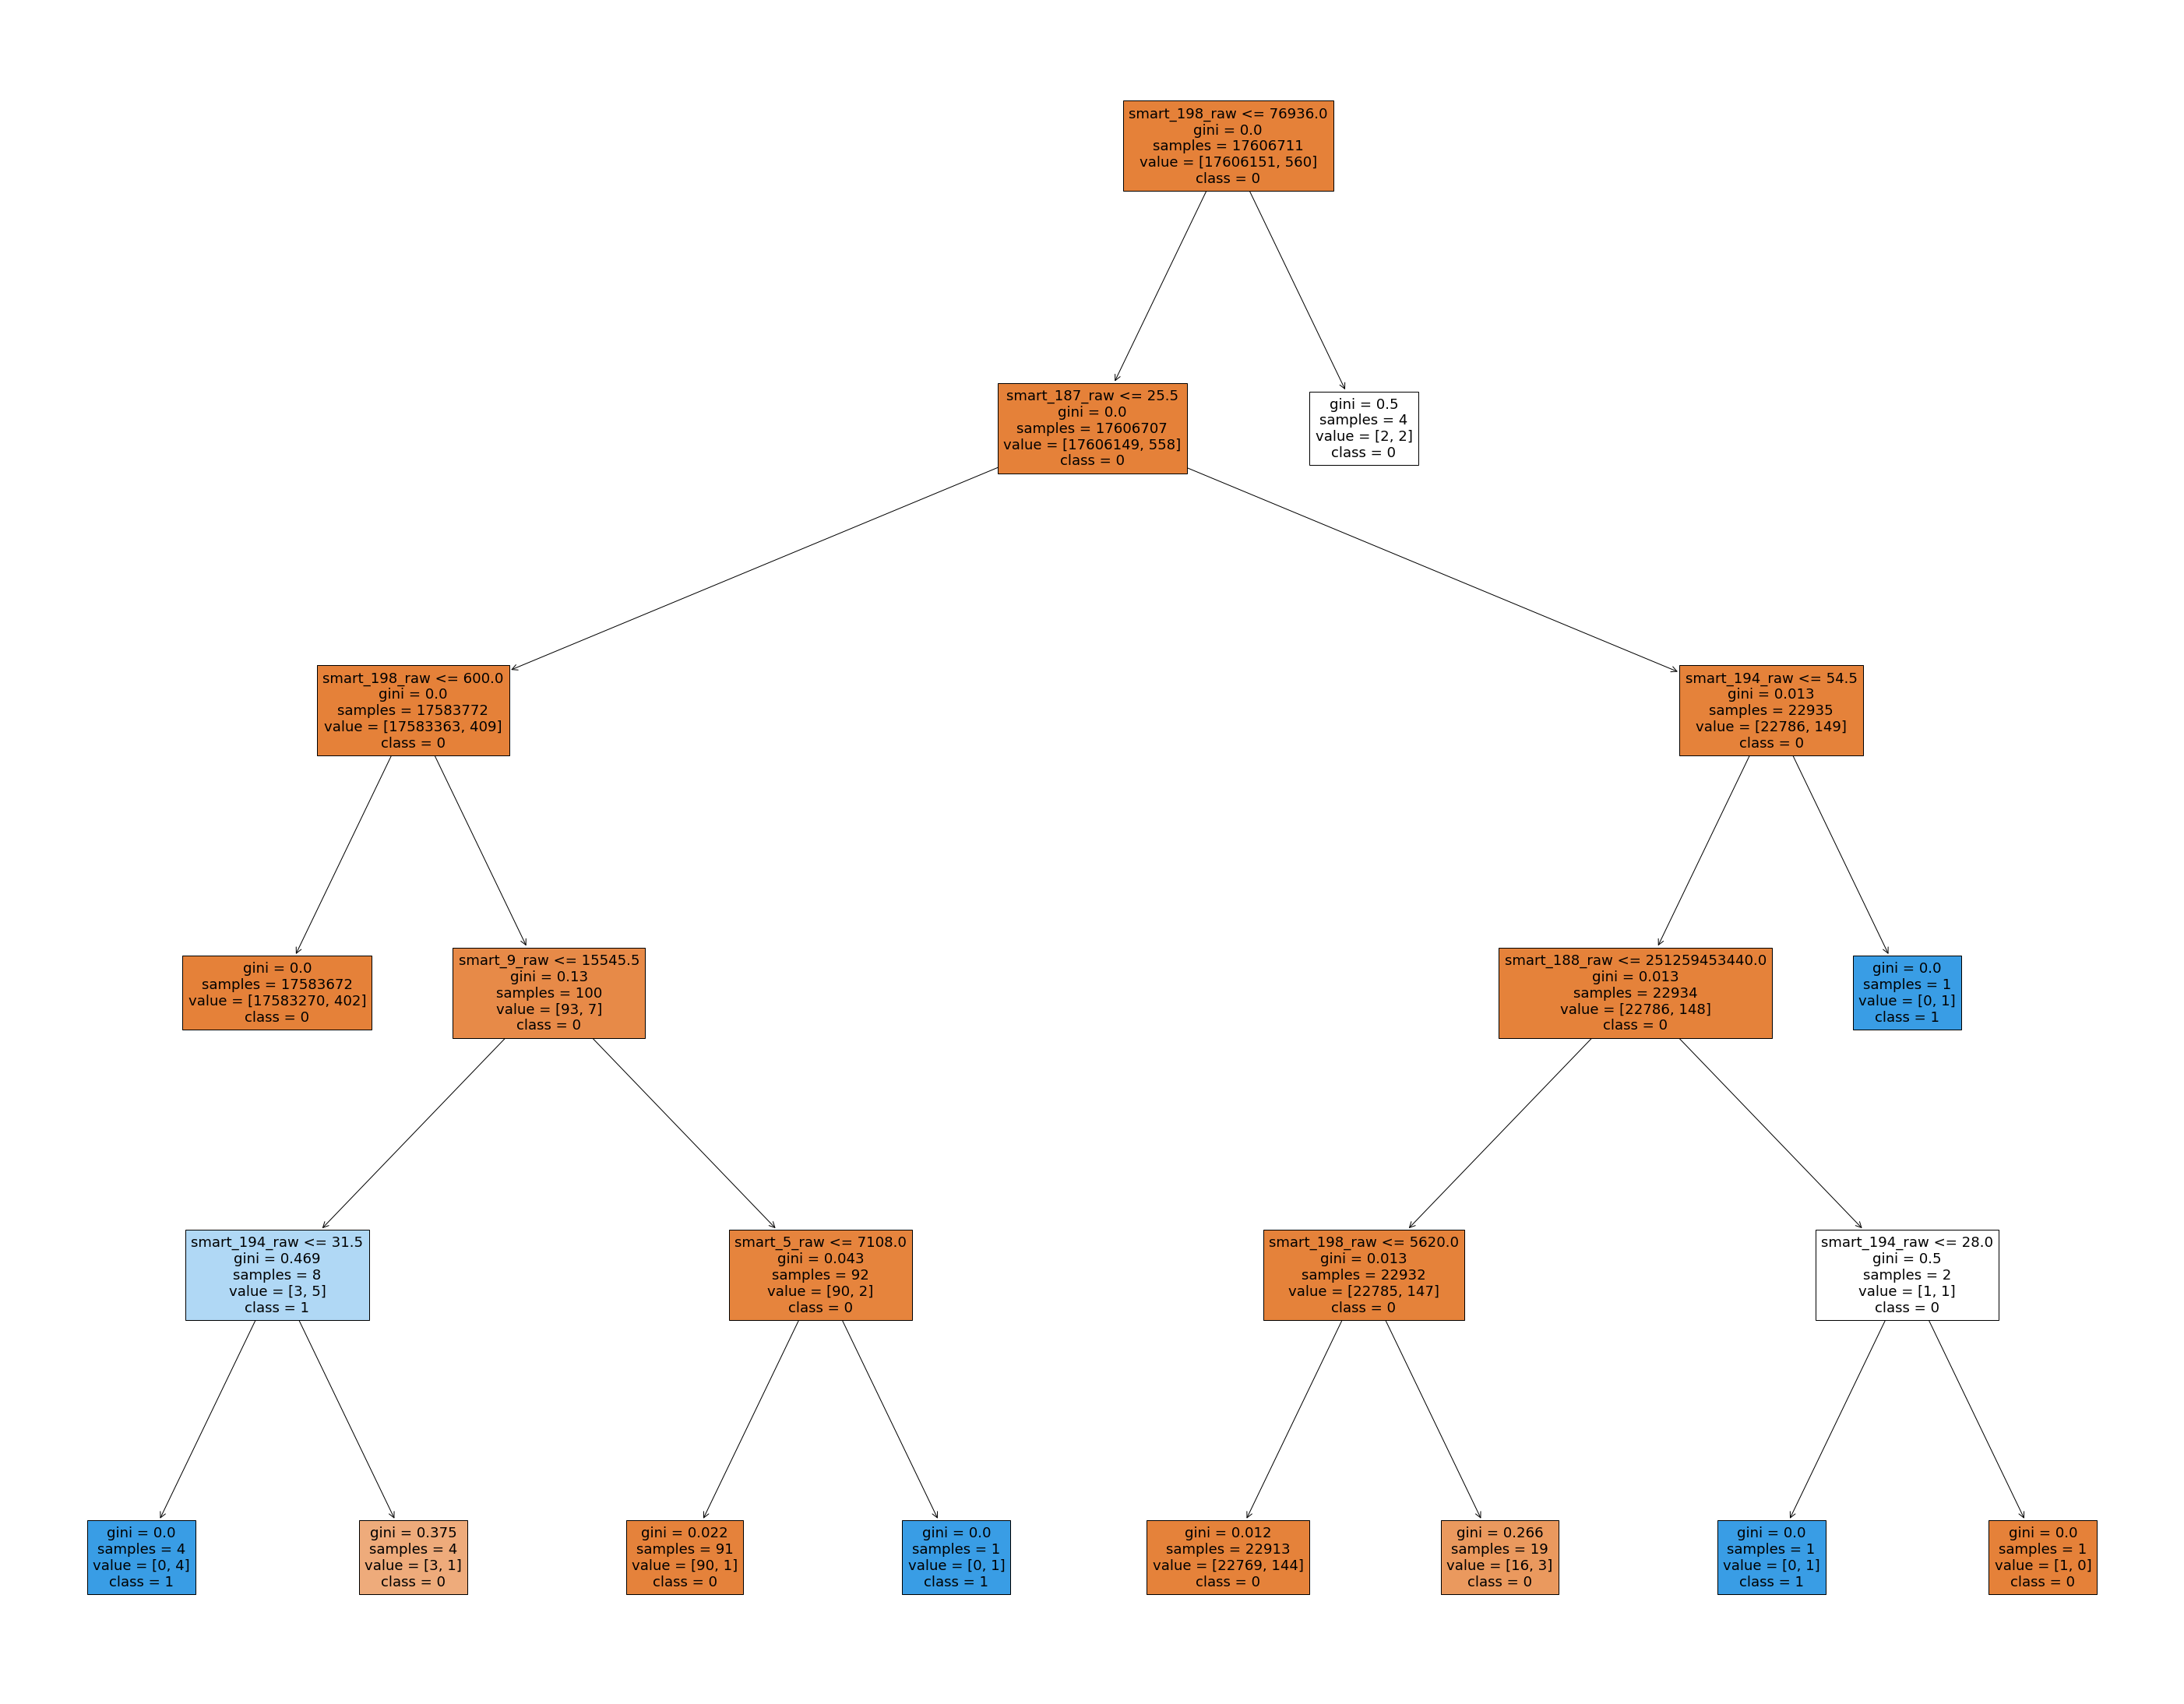

In [34]:
fig = plt.figure(figsize=(50, 40))
_ = plot_tree(dt_model, feature_names=df_features, class_names=['0', '1'], filled=True)

Middels de weergave van de decision tree zou gezegd kunnen worden dat het minder impurities en overfitting plaats vindt. Echter op het moment dat de metrics meegenomen worden dan blijkt dit niet te kloppen. Elke metric berekend is vele male lager dan voorheen.

## Conclusie
Zoals te zien is in het notebook zijn een tweetal bomen opgezet, namelijk: initiële en een pruned boom. Middels de initiële boom kan de conclusie getrokken worden dat de resultaten, in de vorm van accuracy; precision; recall en F1, niet goed zijn op de accuracy score na. Hierbij is de gedachte naar voren gekomen dat misschien het toepassen van prunen betere resultaten levert, echter zoals te zien in de daadwerkelijke pruned resultaten blijkt dit verre van het geval te zijn. De pruned resultaten in vergelijking met de initiële resultaten is zeer slecht. Ookal is de accuracy score bijna hetzelfde de resterende scores zijn verlaagd naar 0.0. Middels deze resultaten kunnen de volgende zaken geconcludeerd worden:
- Pruning heeft een negatief effect op de betreffende dataset.
- Middels de initiële resultaten kan vastgesteld worden dat decision tree verre van de beste datamodel is om `failure` te voorspellen, in relatie tot de huidige dataset.

Al om al, decision tree is in deze instantie niet het beste datamodel om `failure` te voorspellen.

## Model opslaan en laden
Doordat het lang duurt om een model te trainen wordt het model opgeslagen zodat het meerdere keren gebruikt kan worden. Dit wordt gedaan middels de library `pickle`.

### Opslaan

In [15]:
# Initial model
pickle.dump(clf, open("../models/decision_tree_nonpruned.pk1", "wb"))

# Pruned model
# pickle.dump(dt_model, open("../models/decision_tree.pk1", "wb"))

### Laden
Onderstaande code kan gebruikt worden voor het inladen van het model om vervolgens `failure` te voorspellen.

In [16]:
clf_model_saved = pickle.load(open("../models/decision_tree_nonpruned.pk1", "rb"))
dt_model_saved = pickle.load(open("../models/decision_tree.pk1", "rb"))

C:\Users\aMEIzing\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\base.py:324: UserWarning: Trying to unpickle estimator DecisionTreeClassifier from version 1.0.2 when using version 1.0.1. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/modules/model_persistence.html#security-maintainability-limitations
  warnings.warn(


In [17]:
clf_y_pred = clf_model_saved.predict(X_test)
dt_y_pred = dt_model_saved.predict(X_test)

Initiele model metrics en confusion matrix.

In [18]:
print(f"Accuracy: {accuracy_score(y_test, clf_y_pred)}")
print(f"Precision: {precision_score(y_test, clf_y_pred)}")
print(f"Recall: {recall_score(y_test, clf_y_pred)}")
print(f"F1: {f1_score(y_test, clf_y_pred)}")

Accuracy: 0.9999493375026524
Precision: 0.039473684210526314
Recall: 0.0196078431372549
F1: 0.026200873362445413


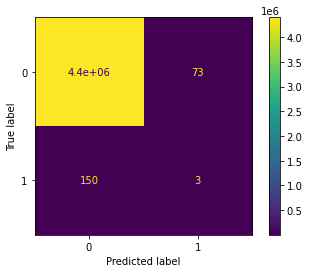

In [22]:
clf_cm = confusion_matrix(y_test, clf_y_pred, labels=clf_model_saved.classes_)

ConfusionMatrixDisplay(
    confusion_matrix=clf_cm,
    display_labels=clf_model_saved.classes_
).from_predictions(y_test, clf_y_pred)

Pruned model metrics en confusion matrix.

In [20]:
print(f"Accuracy: {accuracy_score(y_test, dt_y_pred)}")
print(f"Precision: {precision_score(y_test, dt_y_pred)}")
print(f"Recall: {recall_score(y_test, dt_y_pred)}")
print(f"F1: {f1_score(y_test, dt_y_pred)}")

Accuracy: 0.9999650133426389
Precision: 0.0
Recall: 0.0
F1: 0.0


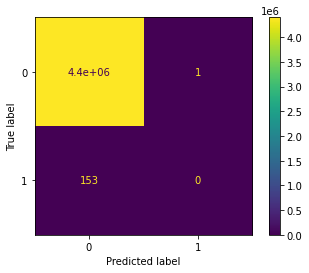

In [21]:
dt_cm = confusion_matrix(y_test, dt_y_pred, labels=dt_model_saved.classes_)

ConfusionMatrixDisplay(
    confusion_matrix=dt_cm,
    display_labels=dt_model_saved.classes_
).from_predictions(y_test, dt_y_pred)